# Prediction of the computer games success

*Data:* historical data on sales of computer games in the Strimchik online store, containing information on game sales, user and expert ratings, genres and platforms, etc. for 1980-2016.

*The purpose of the study:* identify patterns that determine the success of the game, which will allow Strimchik to bet on a potentially popular product and plan advertising campaigns for 2017.

### 1. Opening a data file and examining general information

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Read the data
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# Display the first 10 rows
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


The data was read correctly.


To better see the structure of the dataset, let's look at general information about the data and a couple of gaps.

In [4]:
# General information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Count the proportion of missing values
def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )

isna_view (data)

,percent_space
Critic_Score,51.3
Rating,40.5
User_Score,40.1
Year_of_Release,1.6
Name,0.0
Genre,0.0
Platform,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0


*General datast information:*
- In total, there are 11 columns and more than 16 thousand rows in the dataset;
- There are missing values in six columns;
- Some types of data are saved incorrectly;
- Column names have problems (capital letters).

*Description of data*
- `Name` — game name
- `Platform` — platform
- `Year_of_Release` — release year
- `Genre` - game genre
- `NA_sales` - sales in North America (millions of copies sold)
- `EU_sales` - sales in Europe (millions of copies sold)
- `JP_sales` - sales in Japan (millions of copies sold)
- `Other_sales` - sales in other countries (millions of copies sold)
- `Critic_Score` - score of critics (maximum 100)
- `User_Score` - user score (maximum 10)
- `Rating` - rating from the ESRB organization (age category)

We will also look at the distributions for all quantitative columns in the dataset.

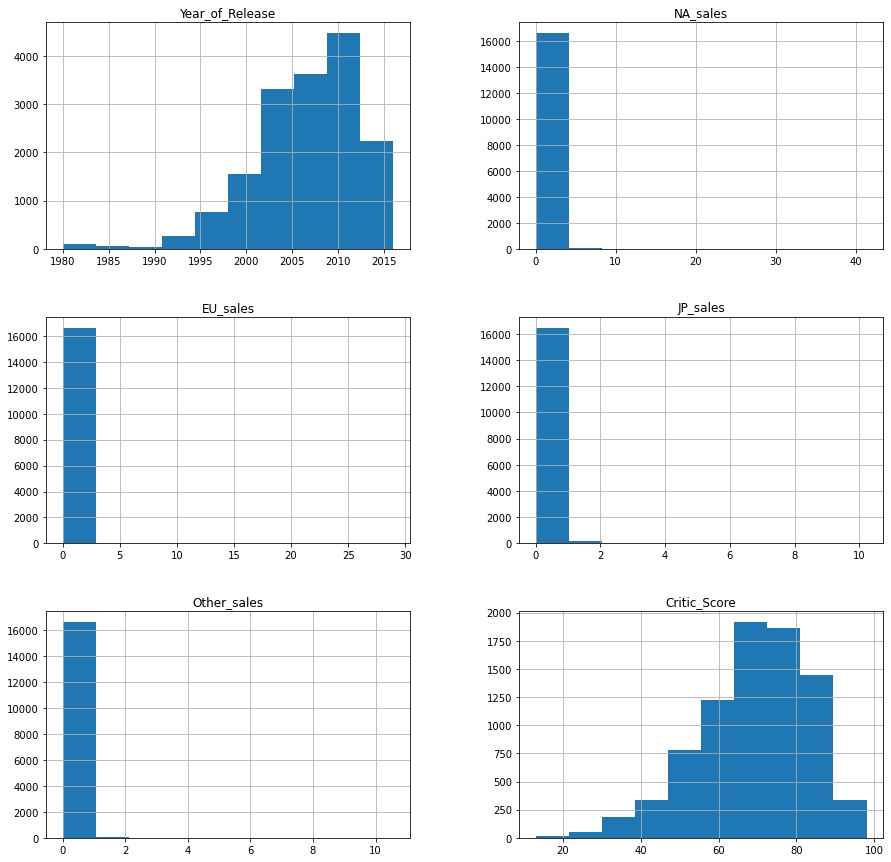

In [7]:
# Histograms for all quantitative columns of the dataset
data.hist(figsize=(15, 15));

*Conclusions from the graph:*
- `Year_of_Release`: since 1980 there has been a general trend towards an increase in the number of computer games;
- `NA_sales`: in North America most often sold up to 10 million copies of games;
- `EU_sales`: in Europe most often sold up to 5 million copies;
- `JP_sales`: in Japan, most often sold up to 2 million copies;
- `Other_sales`: in other countries, up to 2 million copies of games were sold more often;
- `Critic_Score`: the distribution of critics' scores is skewed to the left - higher scores were more often given (above 60 points).

### 2. Data preprocessing

#### 2.1 Column names

Let's bring the names of all columns and categorical variables to lowercase.

In [8]:
# Change the case of column names to lower
data.columns = data.columns.str.lower()

In [9]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
# Change the case of categorical values to lower
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()

In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


OK, all changes have been made correctly.

#### 2.2 Data types

<a id='the_destination'></a>

Some data types need to be changed:

- `year_of_release` - change the type from float to int, since years are integers. For the code to work correctly, we will remove the lines with gaps in this column - there are not so many such lines in dataset (1.6%). In addition, we will not be able to take rows without a specified year for analysis, since filled year is required. Before deleting these rows we will display their descriptive profit statistics on the screen - so we'll make sure the deletion will not damage the data;

- `user_score` - change the type from object to float, since scores are numbers, not categories. Separately we process the string `'tbd'` in this column, which means "to be determined". We will replace this value with NA when changing the type, since these values will be most logically processed as gaps in the future.

- Let's also change all types of float64 to float32 in order to save memory.

In [12]:
data[data['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [13]:
data[data['year_of_release'].notna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,68.994363
std,5.877050,0.818416,0.506696,0.311082,0.187994,13.920060
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Let's compare the descriptive statistics for the sales columns. The first three quartiles for each variable are distributed almost identically - the fourth ones differ: they differ downward in sales for a sample with gaps in years, which can generally be attributed to the sample size. Since this data does not greatly bias the distribution of the rest of the data, it can be removed without fear that this will greatly affect the result.

In [14]:
# Remove missing values for the year_of_release variable
data = data.dropna(subset=['year_of_release'])

In [15]:
# Change Variable Types
data['year_of_release'] = data['year_of_release'].astype(int)

data = data.astype({'na_sales': 'float32', 
                    'eu_sales': 'float32', 
                    'jp_sales': 'float32',
                    'other_sales': 'float32'})

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float32')

In [16]:
# General information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float32
 5   eu_sales         16446 non-null  float32
 6   jp_sales         16446 non-null  float32
 7   other_sales      16446 non-null  float32
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(5), float64(1), int32(1), object(4)
memory usage: 1.1+ MB


In [17]:
# Display the first 10 rows
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.360001,28.959999,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.680000,12.760000,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.610000,10.930000,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.200001,2.260000,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006,platform,11.280000,9.140000,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006,misc,13.960000,9.180000,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009,platform,14.440000,6.940000,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984,shooter,26.930000,0.630000,0.28,0.47,NaN,NaN,NaN


The data types have been successfully changed.

#### 2.3 Missing values

Let's count the number of missing values in the data.

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

*Suggestions for processing passes:*

- `year_of_release`: missing values have been removed (see section 2.1);

- `critic_score`, `user_score`: leave missing values as they are, since there are too many factors to consider to restore the rating data (subjective opinion of users and critics about the game, fan base of a game, the reputation of platform and publisher, etc.).

Most likely, missing values appeared when the ratings for the game did not have time to collect, since the game was released not so long ago, or vice versa, at a time when there were no organizations collecting user and critic ratings yet. Also, missing values could occur due to incorrect recording or uploading of data;

- `rating`: fill in the missing values with fashion, broken down by genre, since genre is likely to have the biggest impact on age limits. Since this variable is categorical and will be needed for analysis, and the number of gaps in it is large (more than 40%), it is necessary to fill in the data.

The probable cause of missing values is an error in saving the data (for example, due to manual entry). Also, the reason may be the release time of the game itself (at a time when there is no such rating or organization for its presentation). Also, the reason for missing values may be a simple lack of data from the ESRB organization.

In [19]:
# Fill missing values in 'rating' with mods grouped by genre and platform
for g in data['genre'].unique(): 
    data.loc[(data['genre'] == g), 
             'rating'] = data.loc[(data['genre'] == g),
                                  'rating'].fillna(data['rating'].mode()[0])

Now let's count the number of gaps in the data.

In [20]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                2
dtype: int64

Since now there are only two missing values in a couple of columns, let's take a closer look at these rows, for example, in the `name` column.

In [21]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These two rows contain missing values in five columns. This number of missing values can be critical to extracting useful information. Let's delete these two rows, since there are only two such rows it will not affect the final result.

The likely reason for the missing values in the `genre` column is the lack of division into genres in the year the game was released (the game was released a long time ago) or the difficulty in determining the genre of the game. It is also impossible to dismiss the error option.

The missing values in the `name` column are most likely a data loading error, as it's hard to imagine a game without a name.

In [22]:
# Remove rows containing missing values in the 'name' column
data = data[data['name'].notna()]

In [23]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

#### 2.4 Adding new columns

Let's calculate the total sales in all regions and put them in a new `total_sales` column, and then look at the transformations in the final dataset.

In [24]:
# total_sales contains the total amount of regional sales for each game
try:
    df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
except:
    data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] +data['other_sales']

Let's look at the unique ESRB rating values and reduce the number of unique categories in them to simplify analysis.

In [25]:
data['rating'].unique()

array(['e', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Among the unique values of the variable there are rows with similar meaning:

1) 'e' ("for everyone"), 'k-a' ("for children and adults") - which we can correspond to a single general category `everyone` - "No age restrictions"

2) 'ec' ("For young children"), 'e10+' ("For everyone 10 years and older") - can be combined into the `children` category

3) 't' - leave the variable unchanged - `teens` ("For teenagers")

4) 'm' ("Adults"), 'ao' ("Adults Only") - merge into the category `adults` ("Adults")

5) 'rp' - leave the variable unchanged - `pending` ("Rating is pending")

In [26]:
# Function to replace names and merge ESRB categories
def esrb_short(rating):
    
    try:
        if rating in ['e', 'k-a']:
            return 'everyone'
        elif rating in ['ec', 'e10+']:
            return 'children'
        elif rating in ['m', 'ao']:
            return 'adults'
        elif rating == 't':
            return 'teens'
        elif rating == 'rp':
            return 'pending'
    
    except:
        return rating

In [27]:
# Adding a rating short column containing a shortened age rating
data['rating_short'] = data['rating'].apply(esrb_short)

In [28]:
data['rating_short'].unique()

array(['everyone', 'adults', 'teens', 'children', 'pending'], dtype=object)

In [29]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_short
0,wii sports,wii,2006,sports,41.360001,28.959999,3.77,8.45,76.0,8.0,e,82.539993,everyone
1,super mario bros.,nes,1985,platform,29.080000,3.580000,6.81,0.77,NaN,NaN,e,40.240002,everyone
2,mario kart wii,wii,2008,racing,15.680000,12.760000,3.79,3.29,82.0,8.3,e,35.520000,everyone
3,wii sports resort,wii,2009,sports,15.610000,10.930000,3.28,2.95,80.0,8.0,e,32.770000,everyone
4,pokemon red/pokemon blue,gb,1996,role-playing,11.270000,8.890000,10.22,1.00,NaN,NaN,e,31.380001,everyone
5,tetris,gb,1989,puzzle,23.200001,2.260000,4.22,0.58,NaN,NaN,e,30.260000,everyone
6,new super mario bros.,ds,2006,platform,11.280000,9.140000,6.50,2.88,89.0,8.5,e,29.799999,everyone
7,wii play,wii,2006,misc,13.960000,9.180000,2.93,2.84,58.0,6.6,e,28.910000,everyone
8,new super mario bros. wii,wii,2009,platform,14.440000,6.940000,4.70,2.24,87.0,8.4,e,28.319998,everyone
9,duck hunt,nes,1984,shooter,26.930000,0.630000,0.28,0.47,NaN,NaN,e,28.309999,everyone


The new column has been added correctly.

#### Duplicates

Let's check the data for duplicates.

In [30]:
data.duplicated().sum()

0

There are no complete duplicates in the data.



Let's check if there are implicit duplicates in the data - games with the same name, genre and release year - this way we will check if the games are repeated in the dataset.

In [31]:
# Pivot table for checking implicit duplicates
(
    data
    .pivot_table(index=['name', 'genre', 'year_of_release'], values=['platform'], aggfunc='count')
    .sort_values(by='platform', ascending=False)
    .head()
)

,,,platform
name,genre,year_of_release,
lego marvel super heroes,action,2013,9
ratatouille,action,2007,9
fifa 14,sports,2013,9
the lego movie videogame,action,2014,8
lego star wars ii: the original trilogy,action,2006,8


It seems there are a lot of implicit duplicates. Let's have a closer look.

In [32]:
data[data['name'] == 'lego marvel super heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_short
730,lego marvel super heroes,x360,2013,action,1.24,0.79,0.00,0.19,80.0,7.6,e10+,2.22,children
945,lego marvel super heroes,ps3,2013,action,0.77,0.76,0.01,0.29,82.0,7.9,e10+,1.83,children
1139,lego marvel super heroes,ps4,2013,action,0.59,0.76,0.01,0.26,83.0,7.7,e10+,1.62,children
1959,lego marvel super heroes,xone,2013,action,0.61,0.35,0.00,0.09,NaN,6.8,e10+,1.05,children
2313,lego marvel super heroes,3ds,2013,action,0.42,0.36,0.04,0.07,61.0,5.2,e10+,0.89,children
2778,lego marvel super heroes,wiiu,2013,action,0.31,0.35,0.02,0.06,82.0,8.0,e10+,0.74,children
3876,lego marvel super heroes,psv,2013,action,0.11,0.29,0.00,0.11,NaN,NaN,e,0.51,everyone
5054,lego marvel super heroes,ds,2013,action,0.22,0.13,0.00,0.03,NaN,4.8,e10+,0.38,children
8369,lego marvel super heroes,pc,2013,action,0.04,0.12,0.00,0.01,78.0,8.1,e10+,0.17,children


It seems "duplicates" are some games that were released on several platforms. In this case, we will also check for duplicates in the `platform` column.

In [33]:
data.loc[:, 'name':'year_of_release'].duplicated().sum()

1

In [34]:
# Rows that contain duplicates in 'name', 'platform', 'year_of_release'
pd.concat(x for _, x in data.groupby(['name', 'platform','year_of_release']) if len(x) > 1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_short
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,e,2.56,everyone
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,e,0.01,everyone


These two rows correspond to the same game released on the same platform. Since the second line has incomplete information about the sales of the game, we will delete it and leave the line with index 604.

In [35]:
# Remove duplicates in the columns 'name', 'platform' and 'year_of_release' (keep the first of the duplicates)
data = data.drop_duplicates(subset=['name', 'platform','year_of_release'], keep='first')

### 3. Exploratory data analysis

#### 3.1 Number of released games by year

Let's calculate how many computer games were released in the context of years.

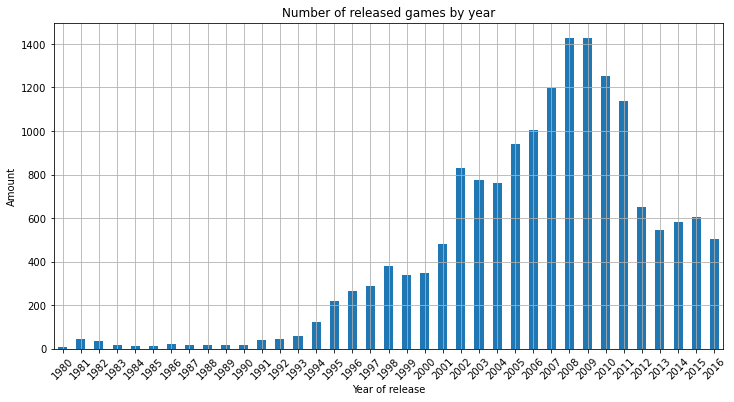

In [36]:
# Visualization of the number of released games by year
(
    data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', 
          figsize=(12, 6), 
          legend=False, 
          grid=True, 
          title='Number of released games by year',
          xlabel='Year of release',
          ylabel='Amount',
          rot=45)
);

*Conclusions from the graph:*
- The distribution of game releases is uniform;
- Until 1994, no more than 200 computer games were produced per year;
- Starting from 1995, the number of published books began to grow sharply;
- Most of the games for the period 1980-2016 were released in 2008 and 2009 - more than 1400;
- In recent years, the number of released games has decreased from about 1100 games per year (2002-2011) to about 600 games per year (2012-2016).

#### 3.2 Number of sales by platform

Let's choose the platforms with the highest total sales and plot the distribution by years.

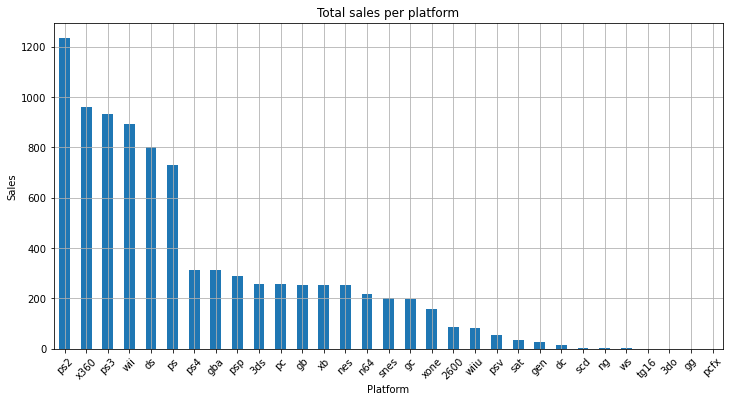

In [37]:
# Pivot table for sum of game sales per platform
sales_per_platform = (
    data
    .pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)


# Pivot table visualization sales_per_platform
sales_per_platform.plot(kind='bar', 
          figsize=(12, 6), 
          legend=False, 
          grid=True, 
          title='Total sales per platform',
          xlabel='Platform',
          ylabel='Sales',
          rot=45);

*Conclusions from the graph:*

There are two major "groups" of platforms:

- With the amount of sales more than 400;
- All the rest, with the amount of sales up to 400.

We are going to select only popular players with a total sales of more than 400 (TOP-6 platforms by sales) and plot sales distribution charts by years. To do this, we will create a column with a platform popularity marker using the self-written function `popular_platforms`.

Popular platforms should include:

- PS2
- X360
- PS3
- Wii
- DS
- PS

In [38]:
# Self-written function popular_platforms declaration
# which returns True if the platform is in the list of popular platforms

def popular_platforms(platform):
   
    try:
        # 'sales_per_popular_platform' stores sales statistics for popular platforms
        sales_per_popular_platform = sales_per_platform.loc[sales_per_platform['total_sales'] >= 400]
        
        if platform in sales_per_popular_platform.index:
            return True
        return False
    
    except:
        return False

In [39]:
# Add a new column to the dataframe using the 'popular_platforms' function
data['popular_platform'] = data['platform'].apply(popular_platforms)

In [40]:
# Pivot table for sales by year for popular platforms
pop_platforms_per_year = (
    data
    .query('popular_platform == True')
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
)

pop_platforms_per_year.head(20)

total_sales
platform year_of_release             
ds       1985                0.020000
         2004               17.270000
         2005              130.139999
         2006              119.809998
         2007              146.940002
         2008              145.309998
         2009              119.540001
         2010               85.019997
         2011               26.180000
         2012               11.010000
         2013                1.540000
ps       1994                6.030000
         1995               35.959999
         1996               94.700005
         1997              136.169998
         1998              169.490005
         1999              144.529999
         2000               96.370003
         2001               35.590000
         2002                6.670000

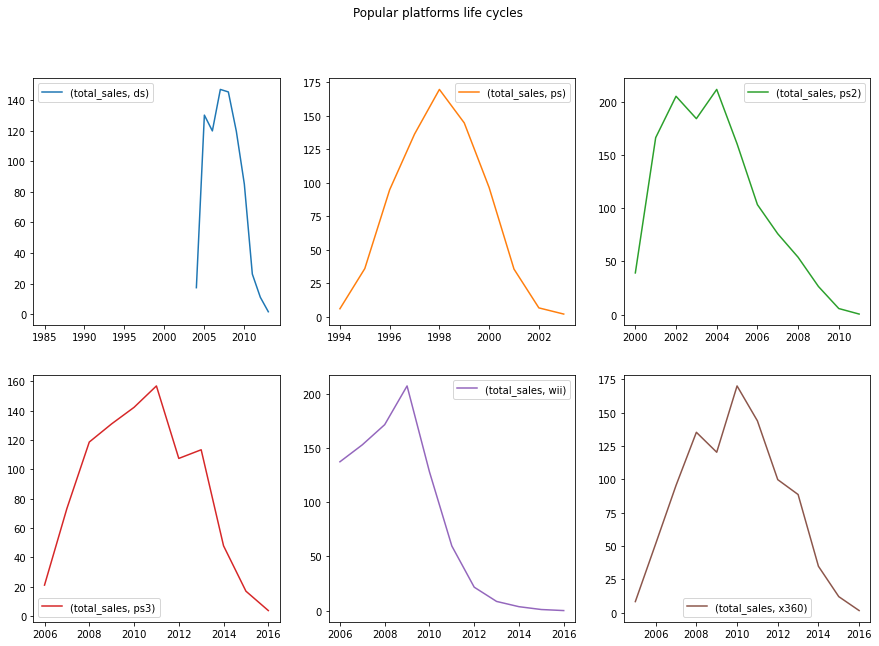

In [41]:
# "life cycles" visualization for popular platforms
(
    pop_platforms_per_year
    .unstack(level=0)
    .plot(kind='line',
          figsize=(15, 10),
          layout=(2, 3),
          subplots=True,
          sharex=False,
          xlabel='',
          title='Popular platforms life cycles')
);

*Conclusions from the charts*

- There were no popular platforms on the market until 1985;
- On average, platforms appear and disappear in about 10 years;
- As soon as a "new player" appears, the previous platform begins to lose popularity;
- At the beginning of the 2000s there was an increase in the number of new popular platforms.

#### 3.3 Up-to-date period for analysis

We will select the most **up-to-date data** - from 2015 to 2016 (since the data for 2016 may not be complete - we will also take the previous year 2015 for analysis), since the computer games industry is changing rapidly, and it is necessary to look at the most " fresh indicators.

Game release statistics for this period differ significantly from previous periods (in terms of sales and popular platforms), so it is more likely 2017 will be more similar to 2015-2016 than to 1980-1994 or 1995-2010.

In [42]:
new_data = data.query('year_of_release >= 2015')

In [43]:
# Display the first 10 rows
new_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_short,popular_platform
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,e,14.63,everyone,False
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58,everyone,False
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,e,7.98,everyone,False
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60,everyone,False
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,e,7.39,everyone,False
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,m,7.17,adults,False
108,pokemon sun/moon,3ds,2016,role-playing,2.98,1.45,2.26,0.45,NaN,NaN,e,7.14,everyone,False
171,uncharted 4: a thief's end,ps4,2016,shooter,1.85,2.50,0.19,0.85,93.0,7.9,t,5.39,teens,False
231,uncharted: the nathan drake collection,ps4,2015,action,2.07,1.71,0.08,0.76,86.0,8.1,t,4.62,teens,False
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,t,4.49,teens,False


In [44]:
# General information about the dataset
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 31 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1108 non-null   object 
 1   platform          1108 non-null   object 
 2   year_of_release   1108 non-null   int32  
 3   genre             1108 non-null   object 
 4   na_sales          1108 non-null   float32
 5   eu_sales          1108 non-null   float32
 6   jp_sales          1108 non-null   float32
 7   other_sales       1108 non-null   float32
 8   critic_score      457 non-null    float64
 9   user_score        559 non-null    float32
 10  rating            1108 non-null   object 
 11  total_sales       1108 non-null   float32
 12  rating_short      1108 non-null   object 
 13  popular_platform  1108 non-null   bool   
dtypes: bool(1), float32(6), float64(1), int32(1), object(5)
memory usage: 92.0+ KB


The new dataset stores 1108 rows and the same 13 columns.

Let's identify potentially profitable platforms. To do this, we group the data by platform and display the amount of profit for each of them, sorted in descending order.

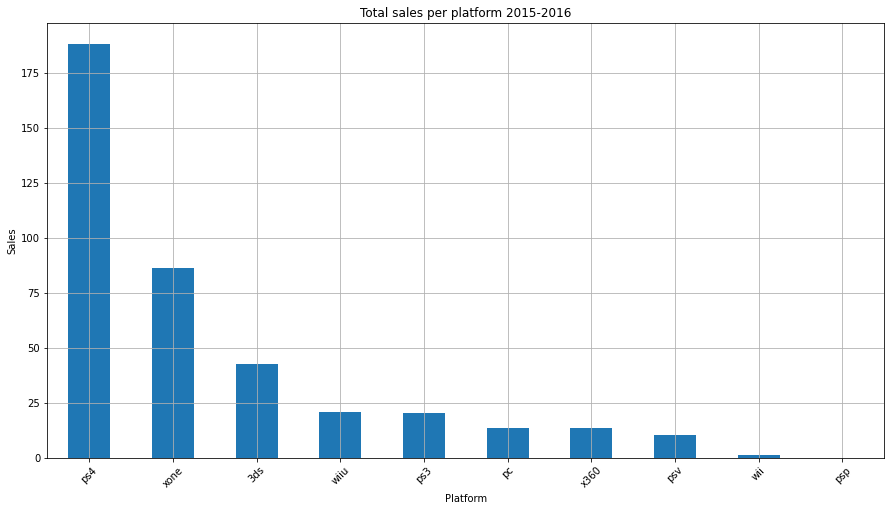

In [45]:
# Pivot table of game sales for each platform for 2015-2016
new_sales_per_platform = (
    new_data
    .pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

# Game sales for each platform for 2015-2016 visualization
new_sales_per_platform.plot(kind='bar', 
                            figsize=(15, 8), 
                            legend=False, 
                            grid=True, 
                            title='Total sales per platform 2015-2016',
                            xlabel='Platform',
                            ylabel='Sales',
                            rot=45);

To visualize the dynamics, we will build sales graphs grouped by years and platforms.

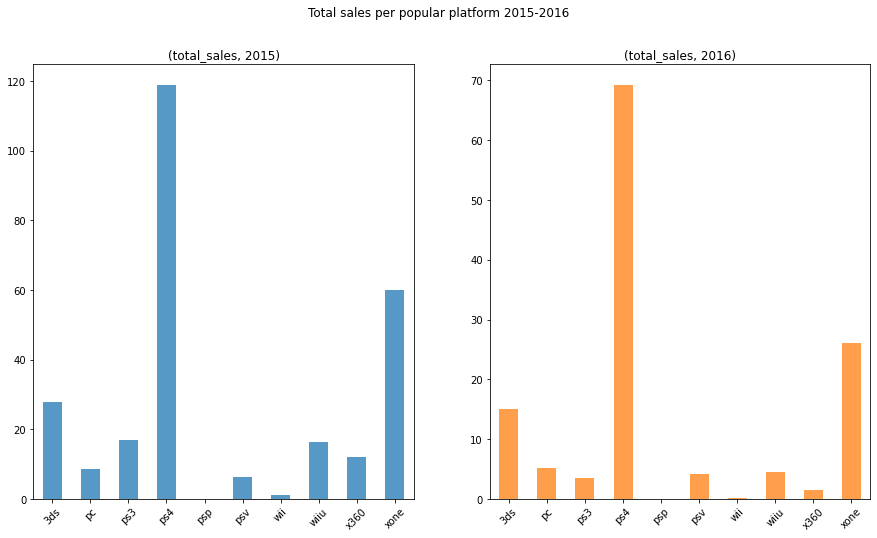

In [46]:
# Pivot table visualization for sales by year for each platform
(
    new_data
    .pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
    .unstack(level=0).plot(kind='bar', 
                           subplots=True, 
                           figsize=(15, 8),
                           layout=(1, 2), 
                           xlabel='',
                           alpha=0.75,
                           title='Total sales per popular platform 2015-2016',
                           legend=False,
                           sharex=False,
                           rot=45)
);

Let's build a boxplot of total game sales by platform to see the distribution.

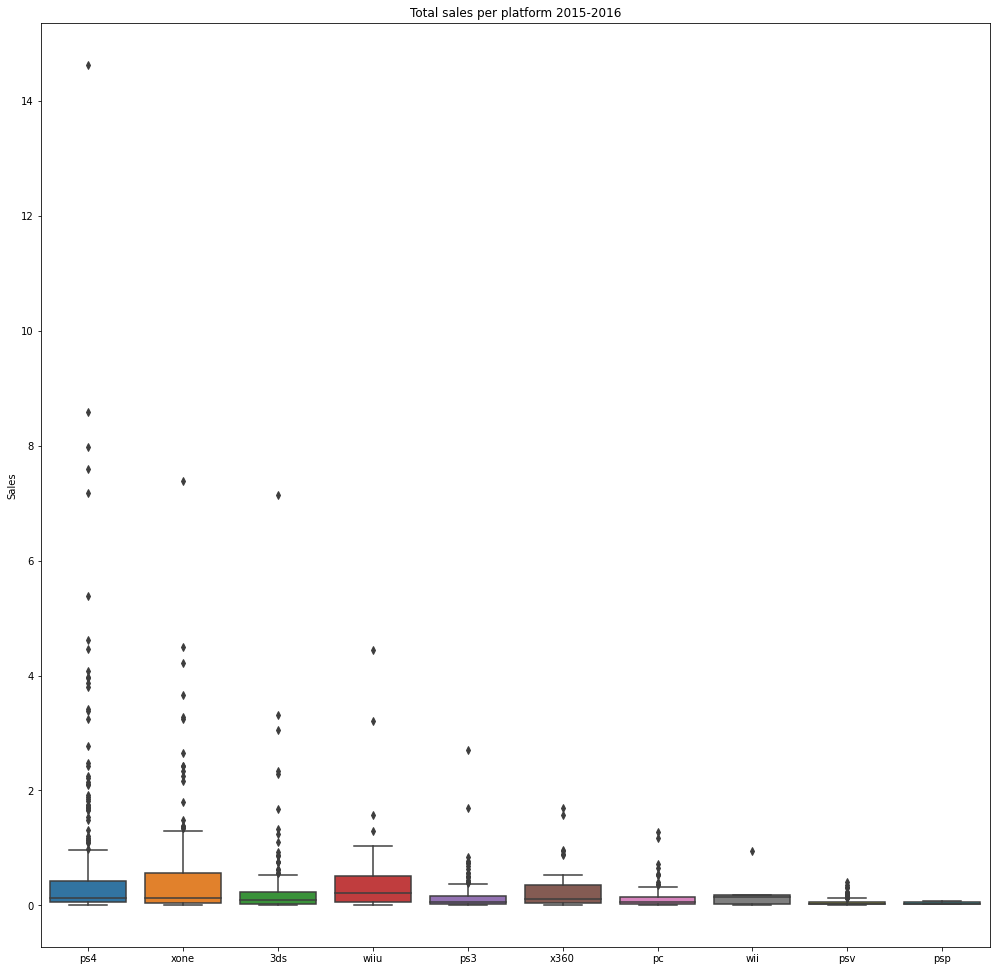

In [47]:
# Set the chart size
plt.figure(figsize=(17, 17))

# Boxplot for the amount of sales per each platform
(
    sns
    .boxplot(x='platform', y='total_sales', data=new_data)
    .set(title='Total sales per platform 2015-2016',
         xlabel='', 
         ylabel='Sales')
)

plt.show()

Since most of the graph is occupied by outliers, we are going to "cut off" the graph by the Total sales level of 1.4 million and display new boxplots on the screen.

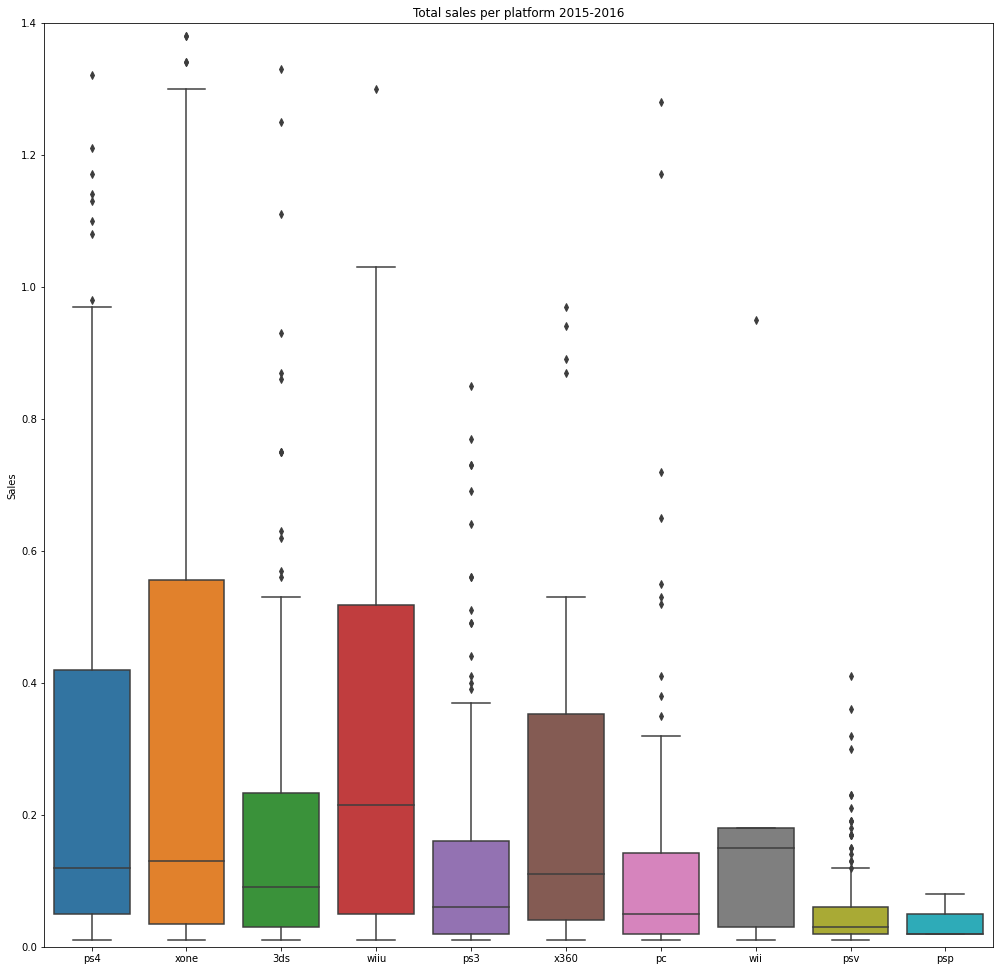

In [48]:
# Set the chart size
plt.figure(figsize=(17, 17))

# Boxplot for the amount of sales per each platform
(
    sns
    .boxplot(x='platform', y='total_sales', data=new_data)
    .set(title='Total sales per platform 2015-2016',
         xlabel='', 
         ylabel='Sales')
)

plt.ylim(0, 1.4)
plt.show()

*Conclusions from the charts:*

- The distributions of all platforms are skewed to the right (most games did not bring in very high revenue);

- Top 5 most popular platforms 2015-2016:
    - PS4
    - XOne
    - 3DS
    - WiiU
    - PS3

- Given the fact that the data for 2016 may not be complete, in 2016 the PS4 platform remains the most popular platform. "Second" and "third" places are occupied by XOne and 3DS, respectively;

- The XOne platform shows the greatest potential for increasing profits, since there are games on this platform that bring significantly more than the median amount;

- The PS4 and WiiU platforms follow XOne in terms of profit potential;

- Despite the fact that the PC platform was not included in the top, it is worth investing in it (personal computers are still popular);

Thus, we can highlight the four potentially most profitable platforms in 2017, based on their historical profitability and the nature of their distributions:

1) PS4

2) Xone

3) 3DS

4) PC

#### 3.4 Relationship between reviews and sales

##### 1) PS4

Let's take a look at the scatterplots of **total sales** and **critics reviews** for a selected potentially profitable PS4 platform.

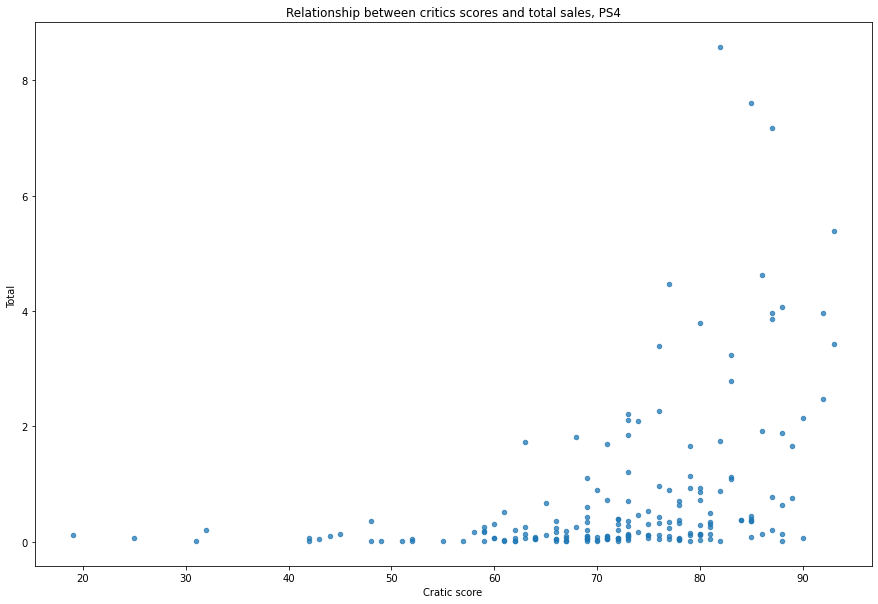

In [49]:
# Visualization of the relationship between total sales and critics scores for PS4 in 2015-2016
(
    new_data
    .query('platform == "ps4"')
    .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 10), 
          alpha=0.75, 
          xlabel='Cratic score', 
          ylabel='Total ',
          title='Relationship between critics scores and total sales, PS4')
);

Let's also look at a scatterplot of **total sales** and **user scores** for four selected potentially profitable platforms.

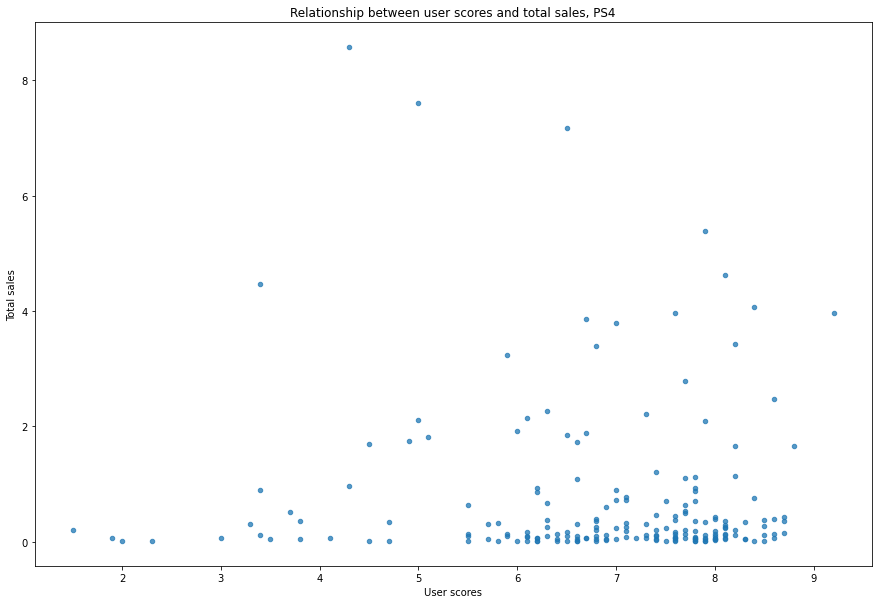

In [50]:
# Visualization of the relationship between total sales and users scores for PS4 in 2015-2016
(
    new_data
    .query('platform == "ps4"')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 10), 
          alpha=0.75, 
          xlabel='User scores', 
          ylabel='Total sales',
          title='Relationship between user scores and total sales, PS4')
);

Let's calculate the correlation coefficients for these three variables.

In [51]:
print('Correlation of total sales and critics scores:', 
      new_data.query('platform == "ps4"')['critic_score'].corr(new_data['total_sales']))

print('Correlation of total sales and user scores:', 
      new_data.query('platform == "ps4"')['user_score'].corr(new_data['total_sales']))

Correlation of total sales and critics scores: 0.3928485566766203
Correlation of total sales and user scores: -0.05973845737148564


*Intermediate conclusions:*

- Critics scores below 50 points are very few, and below 20 points - none at all (the scores scale has been shifted);
- User scores seem to be more stringent, but also shifted to the left (more high ratings than low ones);
- Total sales and critics scores have a moderate positive correlation (0.39);
- Total sales and users scores have a very weak (negligible) negative correlation (-0.06);

There is a weak interconnection between PS4 games revievs and total sales. Only critic ratings are correlated with profit, while user ratings are not. Moreover, it is impossible to establish what exactly is the reason (bad profit affects the critics' ratings, or the ratings affect the profit) only by correlation.

##### 2) XOne

Let's repeat the correlation test for the XOne platform: look at the charts of the distribution of user and critic ratings and total profit, and also calculate the numerical correlation of these variables.

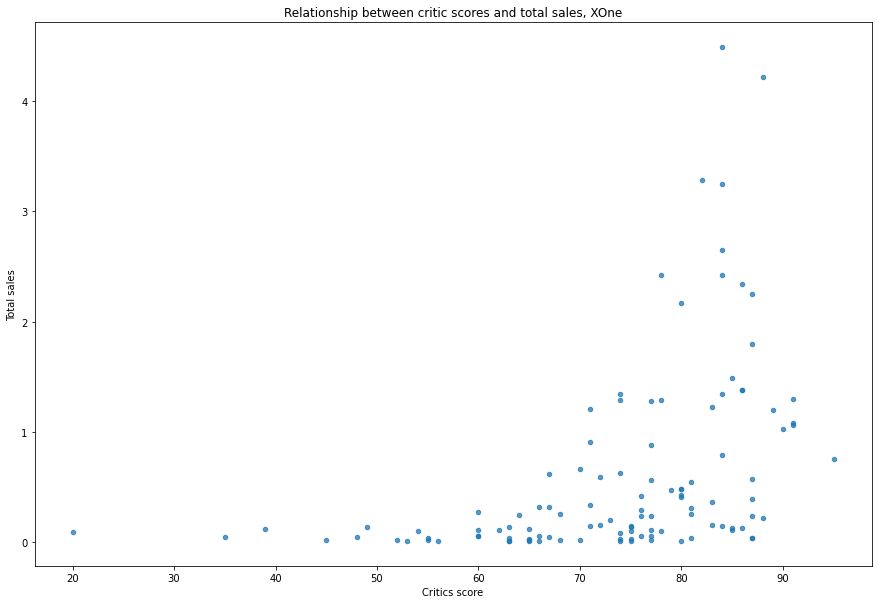

In [52]:
# Visualization of the correlation between total sales and critics scores for XOne in 2015-2016
(
    new_data
    .query('platform == "xone"')
    .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 10), 
          alpha=0.75, 
          xlabel='Critics score', 
          ylabel='Total sales',
          title='Relationship between critic scores and total sales, XOne')
);

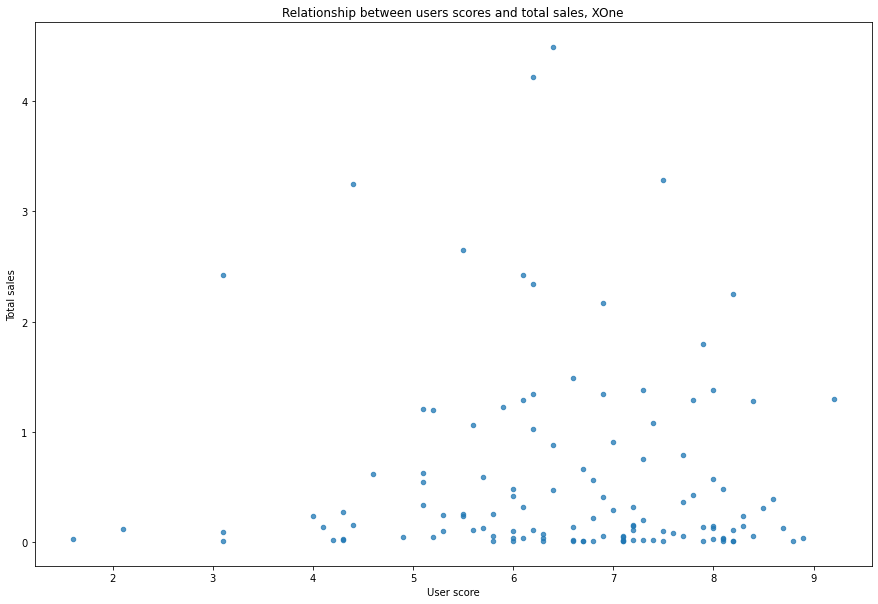

In [53]:
# Visualization of the correlation between total sales and users scores for XOne in 2015-2016
(
    new_data
    .query('platform == "xone"')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 10), 
          alpha=0.75, 
          xlabel='User score', 
          ylabel='Total sales',
          title='Relationship between users scores and total sales, XOne')
);

In [54]:
print('Correlation of total sales and critics scores:', 
      new_data.query('platform == "xone"')['critic_score'].corr(new_data['total_sales']))

print('Correlation of total sales and users scores:', 
      new_data.query('platform == "xone"')['user_score'].corr(new_data['total_sales']))

Correlation of total sales and critics scores: 0.4308887472605584
Correlation of total sales and users scores: -0.04146734378014344


*Intermediate conclusions:*

- On the XOne platform, there is a similar pattern of relationships as on the PS4;
- Critics ratings below 50 points are very few, and below 20 points - none at all (the rating scale is shifted);
- Total profit and critics ratings have an average positive correlation (0.43);
- Total profit and user ratings have a very weak (negligible) negative correlation (-0.04);

Thus, critic ratings on the XOne platform are very moderately correlated with profit, while user ratings are almost unrelated. Moreover, it is impossible to establish what exactly is the reason (poor profit affects the critics ratings, or the ratings affect the profit), based only on the correlation tests carried out.

##### 3) 3DS

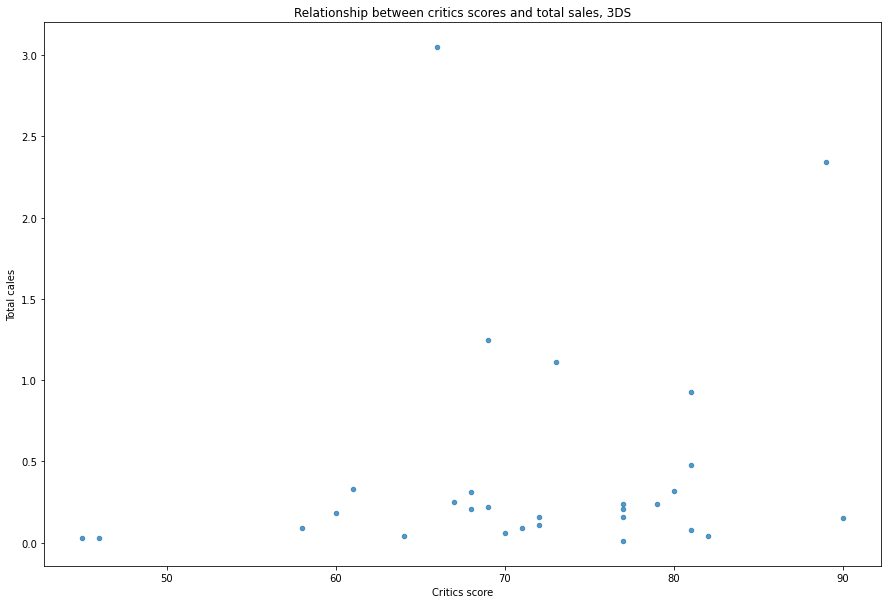

In [55]:
# Visualization of the correlation between total sales and critics scores for 3DS in 2015-2016
(
    new_data
    .query('platform == "3ds"')
    .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 10), 
          alpha=0.75, 
          xlabel='Critics score', 
          ylabel='Total cales',
          title='Relationship between critics scores and total sales, 3DS')
);

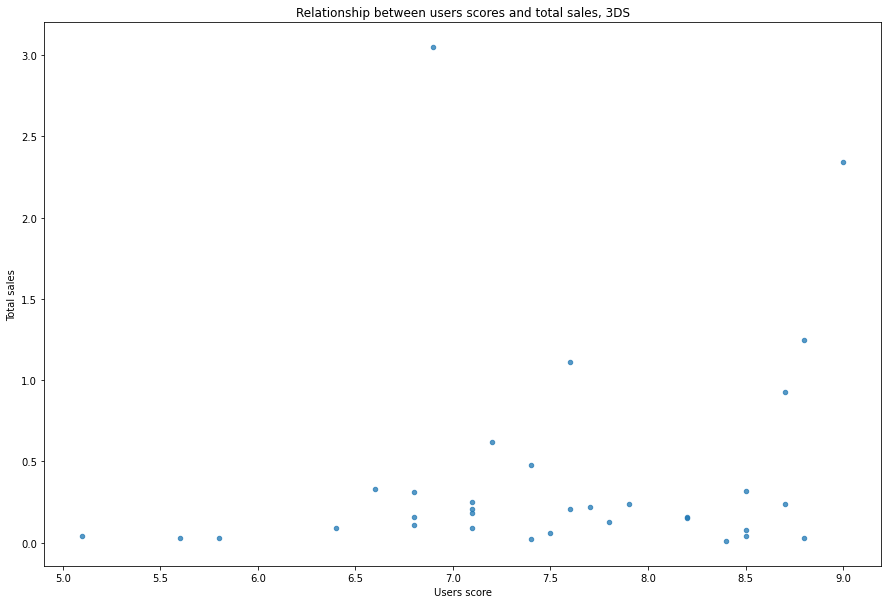

In [56]:
# Visualization of the correlation between total sales and users scores for 3DS in 2015-2016
(
    new_data
    .query('platform == "3ds"')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 10), 
          alpha=0.75, 
          xlabel='Users score', 
          ylabel='Total sales',
          title='Relationship between users scores and total sales, 3DS')
);

In [57]:
print('Correlation of total sales and critics scores:', 
      new_data.query('platform == "3ds"')['critic_score'].corr(new_data['total_sales']))

print('Correlation of total sales and users scores:', 
      new_data.query('platform == "3ds"')['user_score'].corr(new_data['total_sales']))

Correlation of total sales and critics scores: 0.17757457677640698
Correlation of total sales and users scores: 0.19879631398645345


*Intermediate conclusions:*

- No critics scores below 50 points - critics often give high ratings;
- Users practically do not rate below 5;
- On the 3DS platform, there is a weak positive relationship between profit and the critics (cor = 0.18) and users scores (cor = 0.2);
- However, there is not enough data to confirm the conclusions (sample of less than 30 observations).

Thus, critics and users scores on the 3DS platform have little to no correlation with profit.

##### 4) PC

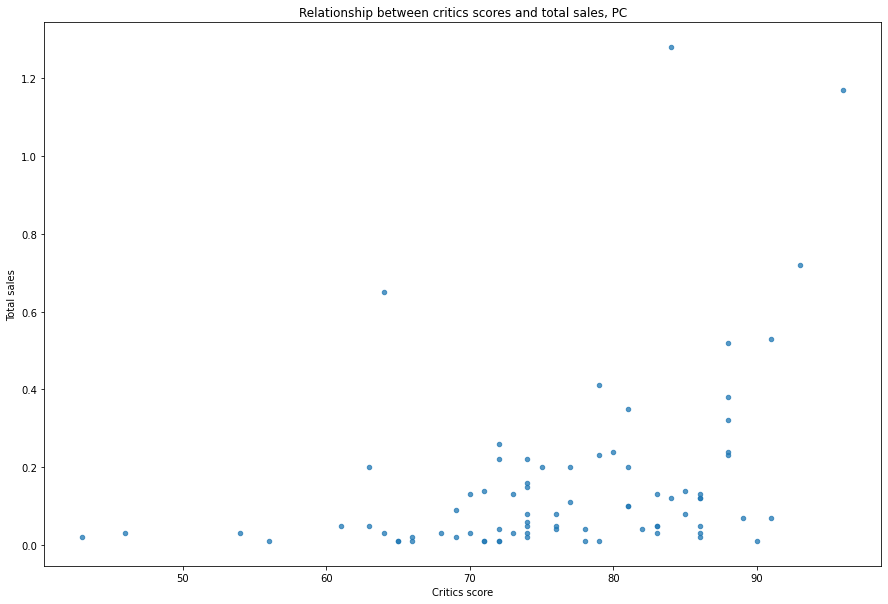

In [58]:
# Visualization of the correlation between total sales and critics scores for PC in 2015-2016
(
    new_data
    .query('platform == "pc"')
    .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 10), 
          alpha=0.75, 
          xlabel='Critics score', 
          ylabel='Total sales',
          title='Relationship between critics scores and total sales, PC')
);

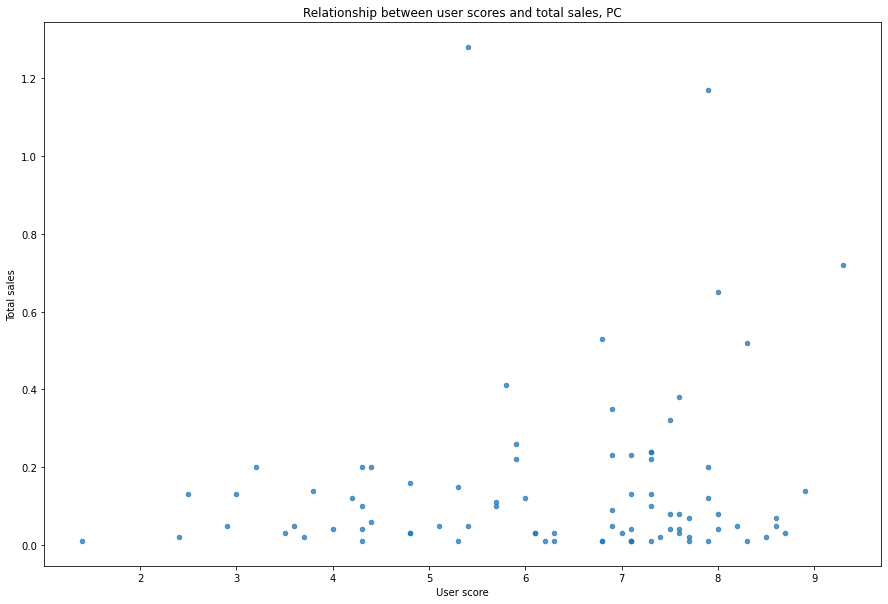

In [59]:
# Visualization of the correlation between total sales and critics scores for PC in 2015-2016
(
    new_data
    .query('platform == "pc"')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 10), 
          alpha=0.75, 
          xlabel='User score', 
          ylabel='Total sales',
          title='Relationship between user scores and total sales, PC')
);

In [60]:
print('Correlation of total sales and critics scores:', 
      new_data.query('platform == "pc"')['critic_score'].corr(new_data['total_sales']))

print('Correlation of total sales and users scores:', 
      new_data.query('platform == "pc"')['user_score'].corr(new_data['total_sales']))

Correlation of total sales and critics scores: 0.37733174427387556
Correlation of total sales and users scores: 0.15038053412787367


*Intermediate conclusions:*

- There are practically no critics scores below 40 points (the rating scale is shifted upwards);
- Users give different ratings to games (which makes this platform stand out - on other popular platforms, users almost do not give low ratings to games), it is possible that games are rarely adapted for PC at present, which leads to lags / bugs during the game and is a reason for negative ratings;
- Total profit and critics ratings have a moderate positive correlation (0.38);
- Total profit and user ratings have a weak positive correlation (0.15);

Thus, critic ratings on the PC platform are moderately correlated with profit, while user ratings are very weakly correlated. Moreover, it is impossible to establish what exactly is the reason (poor profit affects the critics scores, or the ratings affect the profit), based only on the tests carried out.

##### 5) All platform

Let's check whether the critics and users ratings are interconnected with the total profit in general for all platforms.

In [61]:
print('Correlation of total sales and critics scores:', 
      new_data['critic_score'].corr(new_data['total_sales']))
print('Correlation of total sales and users scores:', 
      new_data['user_score'].corr(new_data['total_sales']))

Correlation of total sales and critics scores: 0.32552662466699206
Correlation of total sales and users scores: -0.0019642986103110254


In general, this trend can be traced for all platforms:

- Critics ratings are very slightly positively correlated with profit (cor = 0.33);
- User ratings are not correlated with profit (cor = -0.002).

The selected potentially profitable platforms for promotion are generally similar to other platforms in terms of the relationship between scores and total sales.

#### 3.5 Distribution of games by genre

Let's look at the distribution of games by genre: build a bar graph.

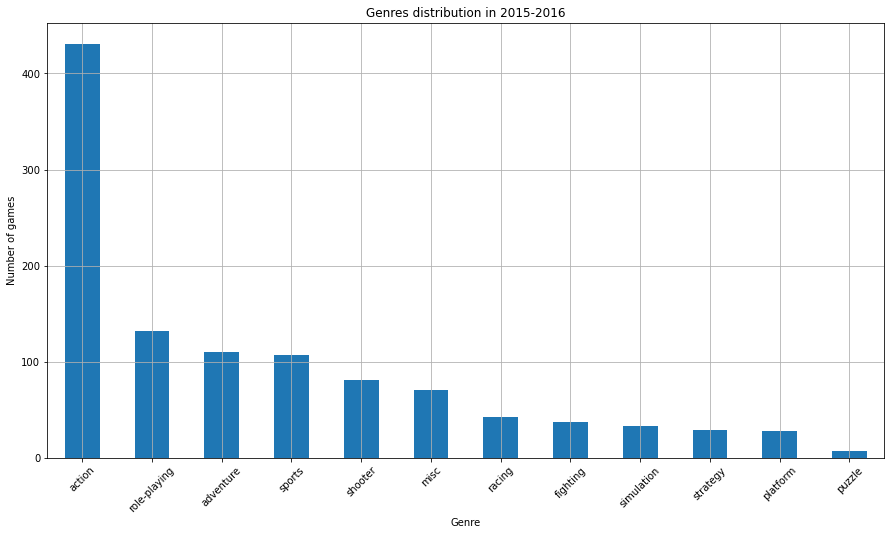

In [62]:
# Visualization of the general distribution of games by genre for 2015-2016
(
    new_data
    .pivot_table(index=['genre'], values='name', aggfunc='count')
    .sort_values('name', ascending=False)
    .plot(kind='bar', 
          figsize=(15, 8), 
          legend=False, 
          grid=True, 
          title='Genres distribution in 2015-2016',
          xlabel='Genre',
          ylabel='Number of games',
          rot=45)
);

Let's track the profitability of each genre over the entire period and over the years.

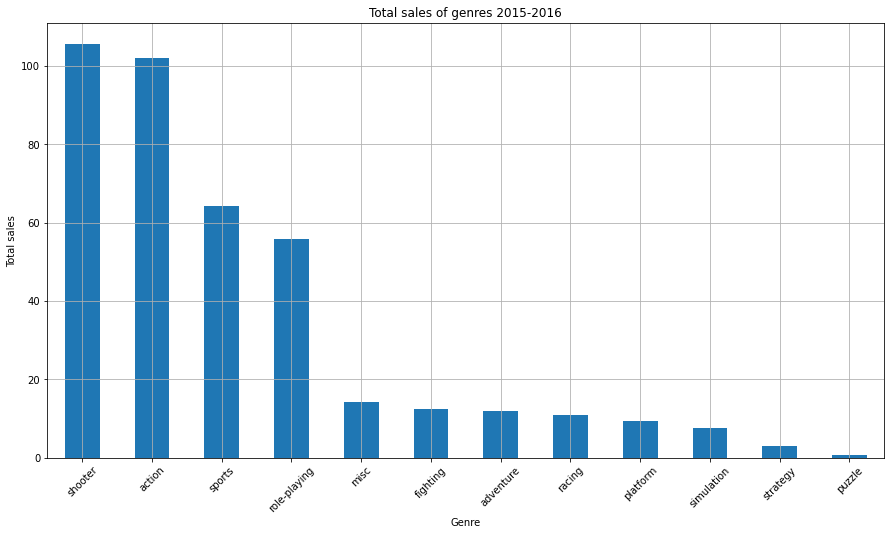

In [63]:
# Visualization of total sales of genres for 2015-2016
(
    new_data
    .pivot_table(index=['genre'], values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', 
          figsize=(15, 8), 
          legend=False, 
          grid=True, 
          title='Total sales of genres 2015-2016',
          xlabel='Genre',
          ylabel='Total sales',
          rot=45)
);

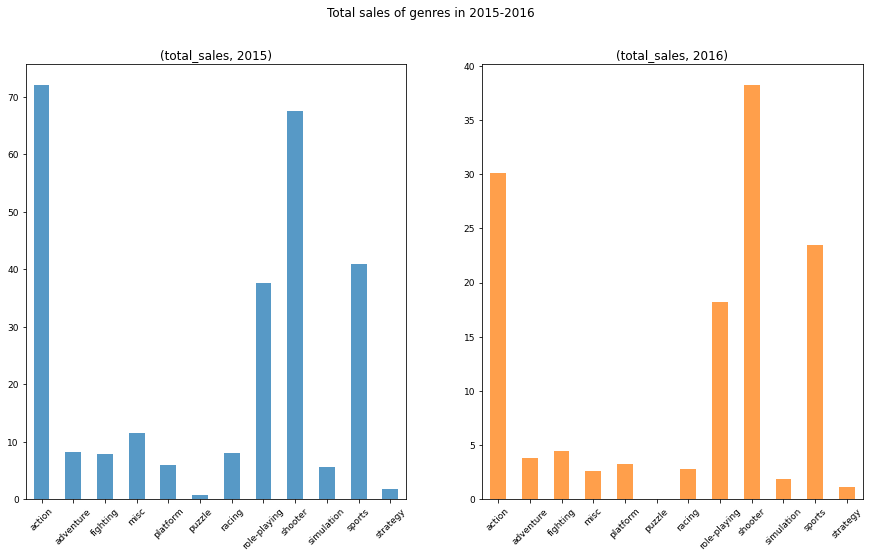

In [64]:
# Visualization of total sales of genres by years 2015-2016
(
    new_data
    .pivot_table(index=['year_of_release', 'genre'], values='total_sales', aggfunc='sum')
    .unstack(level=0).plot(kind='bar', 
                           subplots=True, 
                           figsize=(15, 8),
                           layout=(1, 2), 
                           fontsize=9, 
                           alpha=0.75, 
                           xlabel='',
                           title='Total sales of genres in 2015-2016',
                           legend=False,
                           rot=45)
);

Let's also look at the distribution of total sales of genres on the boxplot.

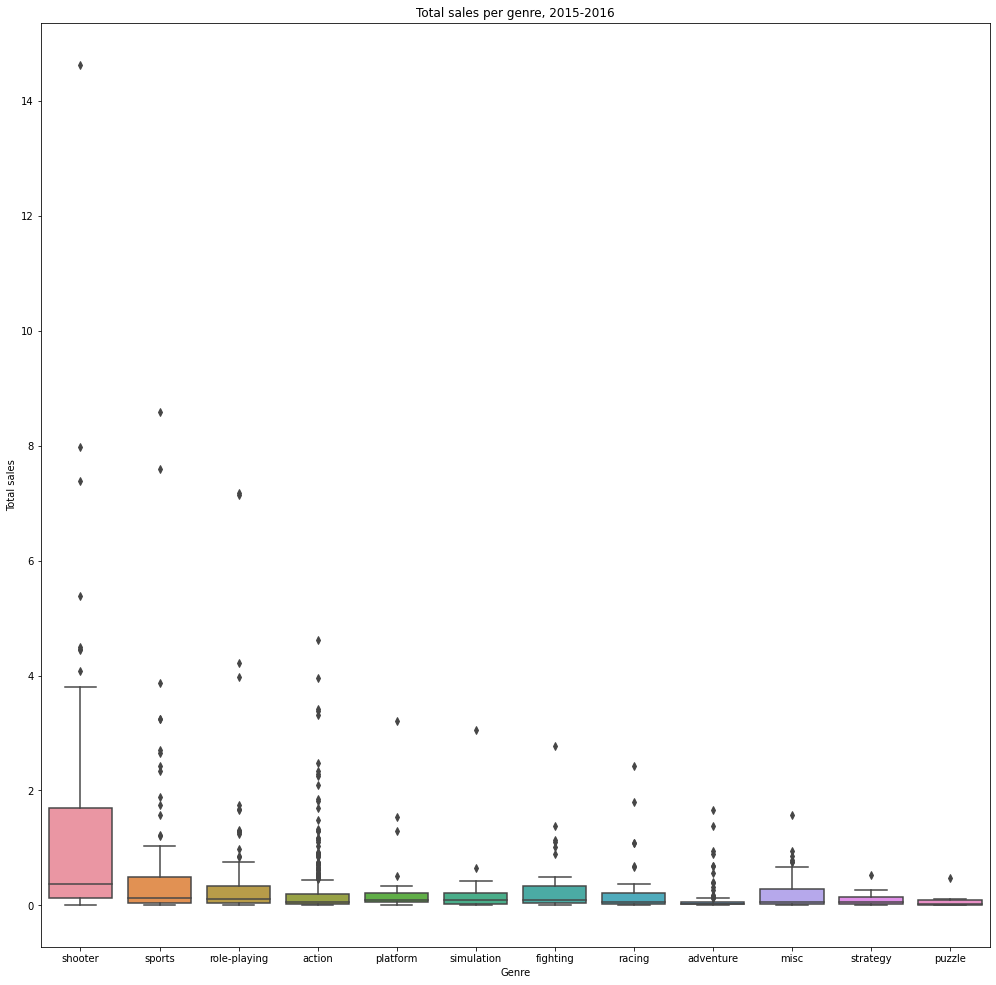

In [65]:
# Set the chart size
plt.figure(figsize=(17, 17))

# Boxplot of total sales per genre
(
    sns
    .boxplot(x='genre', y='total_sales', data=new_data)
    .set(xlabel='Genre', 
         ylabel='Total sales',
         title='Total sales per genre, 2015-2016')
)

plt.show()

Let's also look at the graph without strong outliers - "cut off" the graph at the profit level of 4 million.

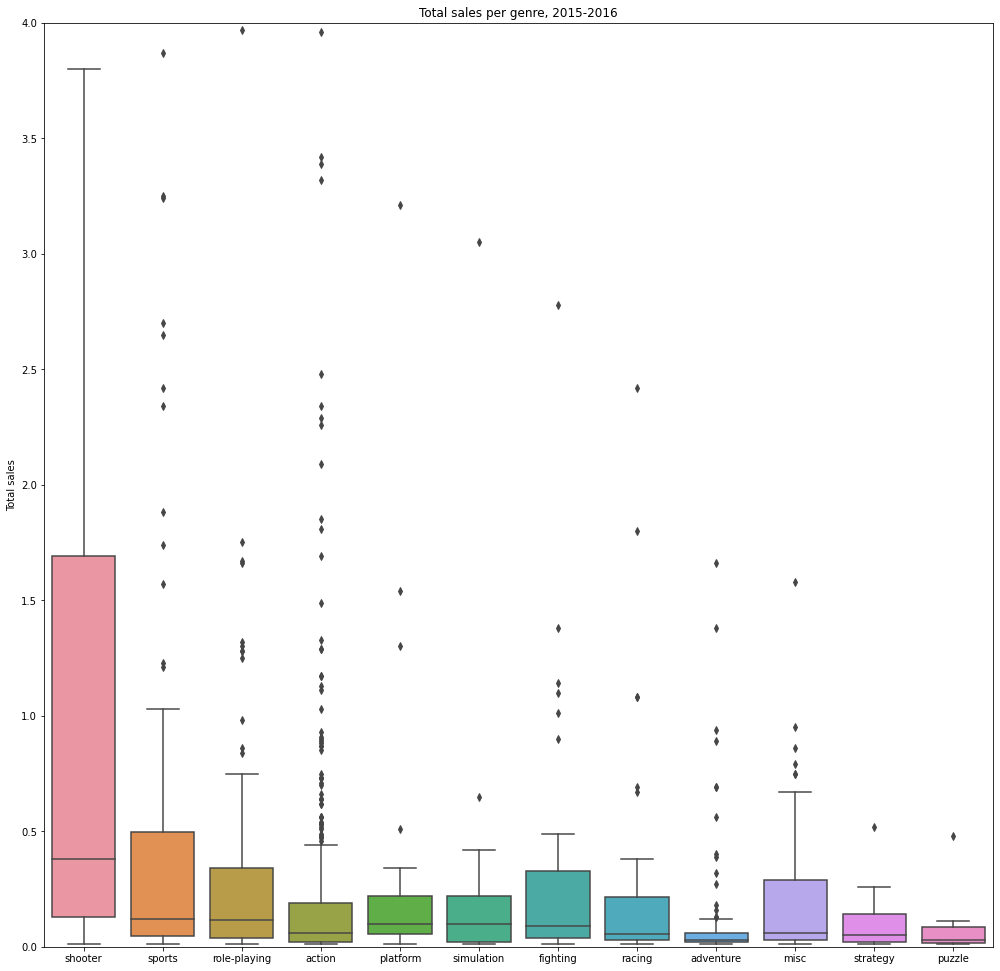

In [66]:
# Set the chart size
plt.figure(figsize=(17, 17))

# Boxplot of total sales per genre
(
    sns
    .boxplot(x='genre', y='total_sales', data=new_data)
    .set(xlabel='', 
         ylabel='Total sales',
         title='Total sales per genre, 2015-2016')
)

plt.ylim(0, 4)
plt.show()

*Intermediate conclusions:*

- Action genre accounts for more than about 40% of total sales;

- Most games of the Action genre (431), least of all - of the Puzzle genre (7);

- Despite the large number of games in the Adventure genre, it is not one of the most profitable;

- Despite the relatively small number of Shooter games, it is one of the most popular;

- The most profitable genres - Shooter and Action (more than 100), the least profitable - Puzzle (0.7);

- Two groups of genres can be distinguished based on their profitability: genres with high profitability (in which it is preferable to invest): Action, Shooter, Role-Playing, Sports; and genres, 2 or more times less profitable - all the rest;

- Shooter games have the greatest profit potential, as there are games among them that bring significantly more than the median amount; then comes Sports, Fighting and Misc;
    
- There are a lot of "stars" among the games in the Action genre - outliers that bring a lot of profit, and due to which this genre is considered very popular, although it is unlikely that at the stage of planning an advertising campaign we will be able to know for sure that this game will shoot;

- Top of the most profitable genres for 2015-2016 is stable: it includes Action, Shooter, Role-Playing and Sports.

Thus, we will highlight the four potentially most profitable genres in 2017, based on their historical profitability and the nature of their distributions:

1) Shooter

2) Sports

3) Role-playing

4) Action

### 4. User portrait of each region

#### 4.1 Platforms

Let's determine the most popular platforms (based on their profits) for each region.

In [67]:
# North America platform popularity count
na = (
    new_data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .reset_index()
    .sort_values('na_sales', ascending=False)
)

# Keep top-5 popular platforms for North America in 'top_na'
top_na = na.head()

# Separately store the list of top platforms in North America
top_na_platform = list(top_na['platform'])

# Save all other platforms in the 'Other' category and summarize their sales
not_top_na = {
    'platform': 'Other', 
    'na_sales': na.query('platform not in @top_na_platform')['na_sales'].sum()
}

# 'new_na' stores the pivot table for total sales of top-5 popular platforms in North America and all other platforms
new_na = top_na.append(not_top_na, ignore_index=True)
new_na

C:\Users\marus\AppData\Local\Temp\ipykernel_14884\4000700172.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_na = top_na.append(not_top_na, ignore_index=True)


,platform,na_sales
0,ps4,63.860001
1,xone,50.299999
2,3ds,10.310000
3,wiiu,8.860000
4,x360,8.050000
5,Other,10.410000


In [68]:
# Europe platform popularity count
eu = (
    new_data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .reset_index()
    .sort_values('eu_sales', ascending=False)
)

# Keep top-5 popular platforms for Europe in 'top_eu'
top_eu = eu.head()

# Separately store the list of top platforms in Europe
top_eu_platform = list(top_eu['platform'])

# Save all other platforms in the 'Other' category and summarize their sales
not_top_eu = {
    'platform': 'Other', 
    'eu_sales': eu.query('platform not in @top_eu_platform')['eu_sales'].sum()
}

# 'new_eu' stores the pivot table for total sales of top-5 popular platforms in Europe and all other platforms
new_eu = top_eu.append(not_top_eu, ignore_index=True)
new_eu

C:\Users\marus\AppData\Local\Temp\ipykernel_14884\344208189.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_eu = top_eu.append(not_top_eu, ignore_index=True)


,platform,eu_sales
0,ps4,83.540001
1,xone,28.100000
2,pc,9.100000
3,3ds,7.390000
4,ps3,7.300000
5,Other,12.510000


In [69]:
# Japan platform popularity count
jp = (
    new_data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .reset_index()
    .sort_values('jp_sales', ascending=False)
)

# Keep top-5 popular platforms for Japan in 'top_jp'
top_jp = jp.head()

# Separately store the list of top platforms in Japan
top_jp_platform = list(top_jp['platform'])

# Save all other platforms in the 'Other' category and summarize their sales
not_top_jp = {
    'platform': 'Other', 
    'jp_sales': jp.query('platform not in @top_jp_platform')['jp_sales'].sum()
}

# 'new_jp' stores the pivot table for total sales of top-5 popular platforms in Japan and all other platforms
new_jp = top_jp.append(not_top_jp, ignore_index=True)
new_jp

C:\Users\marus\AppData\Local\Temp\ipykernel_14884\1632228864.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_jp = top_jp.append(not_top_jp, ignore_index=True)


,platform,jp_sales
0,3ds,23.549999
1,ps4,12.050000
2,psv,8.410000
3,ps3,4.970000
4,wiiu,4.120000
5,Other,0.300000


In [70]:
# top-5 most popular platforms for each region
print('North America:', top_na_platform)
print('Europe:', top_eu_platform)
print('Japan:', top_jp_platform)

North America: ['ps4', 'xone', '3ds', 'wiiu', 'x360']
Europe: ['ps4', 'xone', 'pc', '3ds', 'ps3']
Japan: ['3ds', 'ps4', 'psv', 'ps3', 'wiiu']


For more clarity, let's look at the distribution of the top-5 popular platforms in each region on three charts.

In [71]:
# Merge into table new pivot tables for each region
new = (
    new_na
    .merge(new_eu, left_index=False, right_index=False, how='outer')
    .merge(new_jp, left_index=False, right_index=False, how='outer')
)

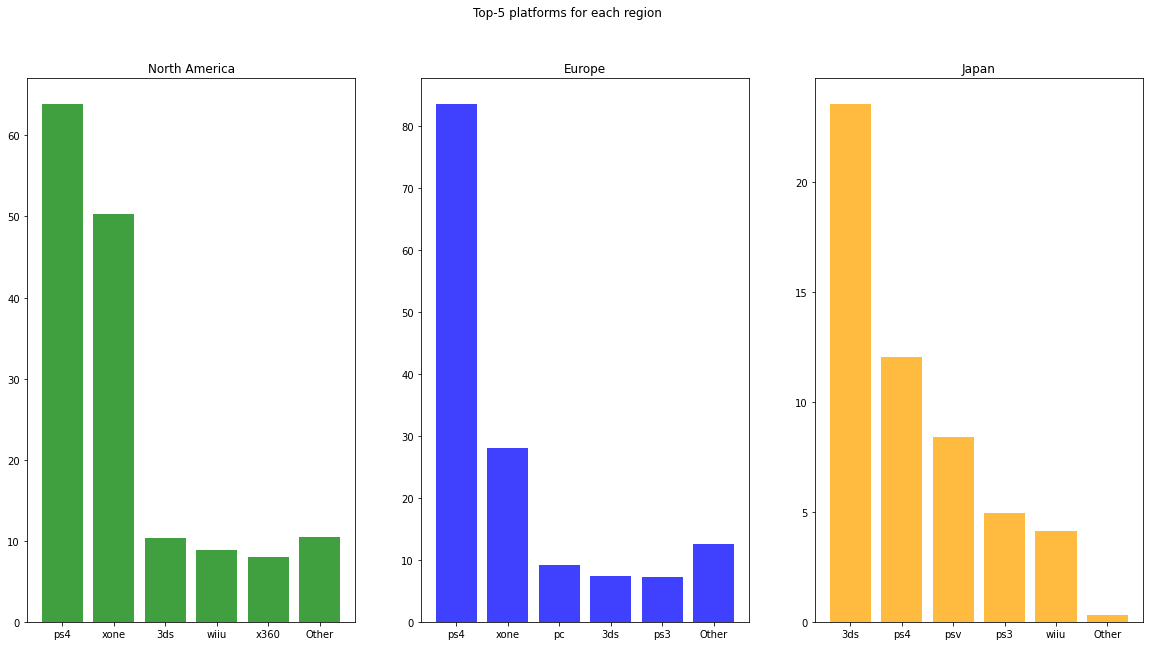

In [72]:
# Set chart size
plt.figure(figsize=(20, 10))

# Set the name of the graph
plt.suptitle('Top-5 platforms for each region')

# Three sub-graphs - one for each region
plt.subplot(1, 3, 1).set_title('North America')
plt.bar(new_na['platform'], new_na['na_sales'], color='green', alpha=0.75)

plt.subplot(1, 3, 2).set_title('Europe')
plt.bar(new_eu['platform'], new_eu['eu_sales'], color='blue', alpha=0.75)

plt.subplot(1, 3, 3).set_title('Japan')
plt.bar(new_jp['platform'], new_jp['jp_sales'], color='orange', alpha=0.75);

*Intermediate conclusions:*

- PS4 and 3DS are among the most popular platforms in all three regions;

- In North America and Europe, the top 5 most popular platforms also include XOne;

- In North America and Japan, the top 5 most popular platforms include WiiU;

- In Europe and Japan, the top 5 most popular platforms include PS3;

- Only in Europe, the top 5 most popular platforms include PC;

- Japan differs in the top of the most popular platforms, PSV and WiiU are present - two portable consoles at once;;

- The Japanese market as a whole is "smaller" than North American and European;

- In general, PS4, 3DS and XOne platforms stand out in terms of profitability - it is preferable to invest in them;

- Sales of 3DS in Japan in absolute terms are significantly higher than in other regions;

- Sales of XOne in North America are almost 2 times higher than in Europe.

#### 4.2 Genres

Let's determine the most popular genres based on their total sales for each region.

In [73]:
# Genre popularity count for North America
na = (
    new_data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .reset_index()
    .sort_values('na_sales', ascending=False)
)

# Save the top-5 popular genres for North America in 'top_na'
top_na = na.head()

# Separately store the list of top genres in North America
top_na_genre = list(top_na['genre'])

# Save all other genres in the "Other" category and summarize their sales
not_top_na = {
    'genre': 'Other', 
    'na_sales': na.query('genre not in @top_na_genre')['na_sales'].sum()
}

# 'new_na' stores the pivot table for total sales of top-5 popular genres in North America and all other platforms
new_na = top_na.append(not_top_na, ignore_index=True)
new_na

C:\Users\marus\AppData\Local\Temp\ipykernel_14884\1852635388.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_na = top_na.append(not_top_na, ignore_index=True)


,genre,na_sales
0,shooter,48.180000
1,action,33.680000
2,sports,26.309999
3,role-playing,19.820000
4,misc,5.580000
5,Other,18.219999


In [74]:
# Genre popularity count for Europe
eu = (
    new_data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .reset_index()
    .sort_values('eu_sales', ascending=False)
)

# Save the top-5 popular genres for Europe in 'top_eu'
top_eu = eu.head()

# Separately store the list of top genres in Europe
top_eu_genre = list(top_eu['genre'])

# Save all other genres in the "Other" category and summarize their sales
not_top_eu = {
    'genre': 'Other', 
    'eu_sales': eu.query('genre not in @top_eu_genre')['eu_sales'].sum()
}

# 'new_eu' stores the pivot table for total sales of top-5 popular genres in North America and all other platforms
new_eu = top_eu.append(not_top_eu, ignore_index=True)
new_eu

C:\Users\marus\AppData\Local\Temp\ipykernel_14884\292571247.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_eu = top_eu.append(not_top_eu, ignore_index=True)


,genre,eu_sales
0,shooter,40.279999
1,action,34.820000
2,sports,27.820000
3,role-playing,17.210001
4,racing,6.520000
5,Other,21.289999


In [75]:
# Genre popularity count for Japan
jp = (
    new_data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .reset_index()
    .sort_values('jp_sales', ascending=False)
)

# Save the top-5 popular genres for Europe in 'top_jp'
top_jp = jp.head()

# Separately store the list of top genres in Japan
top_jp_genre = list(top_jp['genre'])

# Save all other genres in the "Other" category and summarize their sales
not_top_jp = {
    'genre':'Other', 
    'jp_sales': jp.query('genre not in @top_jp_genre')['jp_sales'].sum()
}

# 'new_jp' stores the pivot table for total sales of top-5 popular genres in North America and all other platforms
new_jp = top_jp.append(not_top_jp, ignore_index=True)
new_jp

C:\Users\marus\AppData\Local\Temp\ipykernel_14884\1884832267.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_jp = top_jp.append(not_top_jp, ignore_index=True)


,genre,jp_sales
0,action,23.049999
1,role-playing,13.410000
2,shooter,3.790000
3,misc,3.190000
4,adventure,2.220000
5,Other,7.740000


In [76]:
# top-5 most popular platforms for each region
print('North America:', top_na_genre)
print('Europe:', top_eu_genre)
print('Japan:', top_jp_genre)

North America: ['shooter', 'action', 'sports', 'role-playing', 'misc']
Europe: ['shooter', 'action', 'sports', 'role-playing', 'racing']
Japan: ['action', 'role-playing', 'shooter', 'misc', 'adventure']


For more clarity, let's look at the distribution of the top-5 popular genres in each region on three graphs.

In [77]:
# Merge into table new pivot tables for each region
new = (
    new_na
    .merge(new_eu, left_index=False, right_index=False, how='outer')
    .merge(new_jp, left_index=False, right_index=False, how='outer')
)

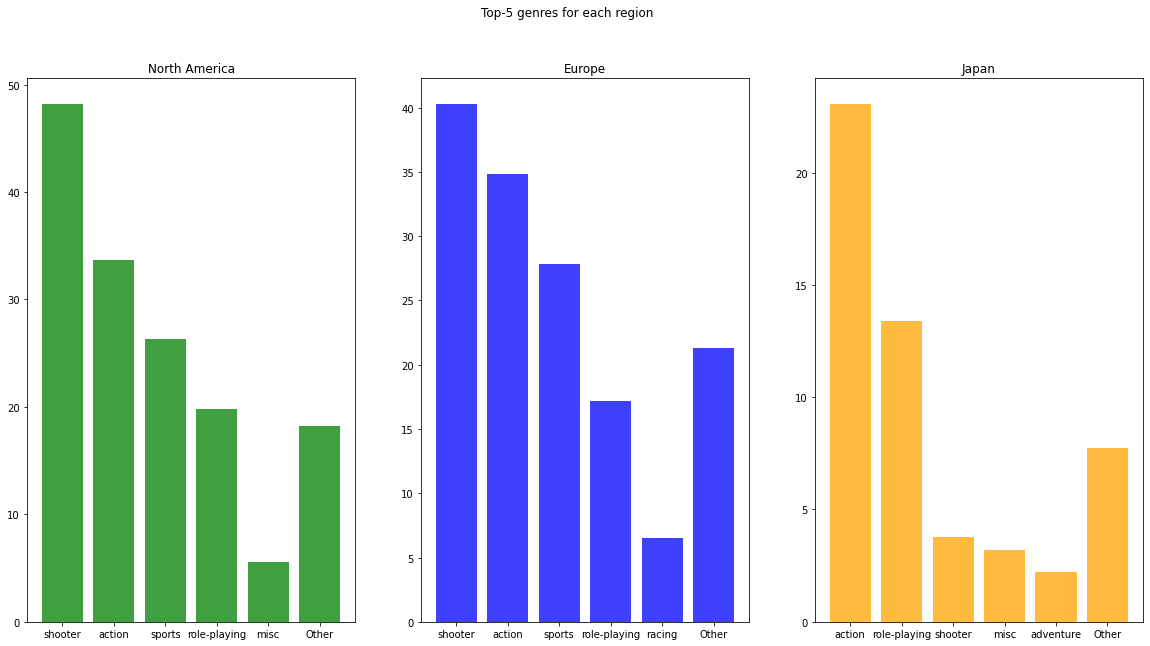

In [78]:
# Set chart size
plt.figure(figsize=(20, 10))

# Set the name of the graph
plt.suptitle('Top-5 genres for each region')

# Three sub-graphs - one for each region
plt.subplot(1, 3, 1).set_title('North America')
plt.bar(new_na['genre'], new_na['na_sales'], color='green', alpha=0.75)

plt.subplot(1, 3, 2).set_title('Europe')
plt.bar(new_eu['genre'], new_eu['eu_sales'], color='blue', alpha=0.75)

plt.subplot(1, 3, 3).set_title('Japan')
plt.bar(new_jp['genre'], new_jp['jp_sales'], color='orange', alpha=0.75);

*Intermediate conclusions:*

- Top-4 most popular genres in North America and Europe are Action, Shooter, Sports and Role-Playing;

- In North America and Japan, the top-5 popular genres include Misc;

- In Europe, among the 5 most popular genres is Racing, which is not in other regions;

- Japan is different from America and Europe: among the most popular genres there is Adventure, and Shooter is only in third place in popularity, significantly inferior to the Action and Role-Playing genres;

- The Sports genre is not as popular in Japan, although it is very popular in North America and Europe;

- In general, Action and Shooter genres stand out in terms of profitability in all regions - it is preferable to invest in them.

It can be said that **Japan differes from other regions** in terms of genres too, while **Europe and North America are very similar** to each other.

#### 4.3 ESRB rating

Let's see if the ESRB rating affects total sales in a particular region.

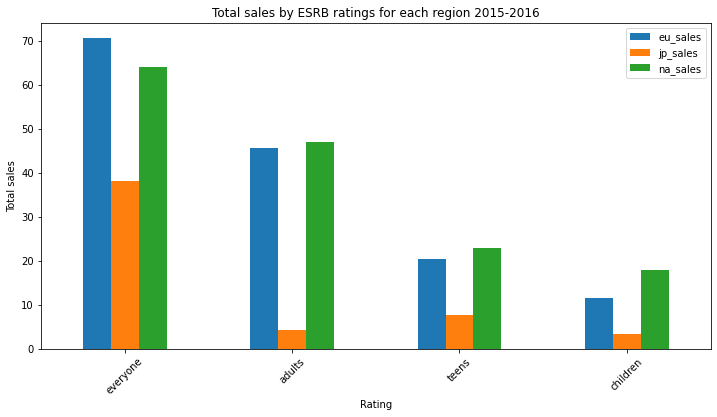

In [79]:
# Total sales of games in each of the ESRB ratibgs by region
esrb_per_region = (
    new_data
    .pivot_table(index=['rating_short'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False)
)

# Visualization of the pivot table 'esrb_per_region'
esrb_per_region.plot(kind='bar',
                     figsize=(12, 6), 
                     legend=True, 
                     title='Total sales by ESRB ratings for each region 2015-2016',
                     xlabel='Rating',
                     ylabel='Total sales',
                     rot=45);

In [80]:
print('North America:', *esrb_per_region.sort_values('na_sales', ascending=False).index)
print('Europe:', *esrb_per_region.sort_values('eu_sales', ascending=False).index)
print('Japan:', *esrb_per_region.sort_values('jp_sales', ascending=False).index)

North America: everyone adults teens children
Europe: everyone adults teens children
Japan: everyone teens adults children


*Intermediate conclusions:*

The ESRB rating does affect game sales in certain regions:

In **North America and Europe** the popularity situation for games with a certain age rating is similar:

1) the most popular games rated "for everyone",

2) "for adults",

3) "for teenagers"

4) and least popular games "for children";


In **Japan** the situation is somewhat different:

1) games rated "for everyone" are very popular

2) then there are games "for teenagers",

3) "for adults",

4) and the least popular games are "for children".


In general, games for adults are more popular in North America and Europe than games for teenagers, while in Japan the situation is reversed.

### 5. Hypothesis testing

Let us formulate and test hypotheses regarding the distribution of user ratings for the XOne and PC platforms.

To do this, we will conduct two-tailed Student's t-test for independent samples with a significance criterion of 0.01, taking into account the fact that we cannot be sure that the variances for these two samples are equal. The null hypothesis is always about the absence of differences, the first one is about their presence.


```
H_0: The average user ratings of the Xbox One and PC platforms are equal.
H_1: The average user ratings of the Xbox One and PC platforms differ.

alpha = 0.01
```

In [81]:
# Samples for testing hypotheses - select rows without missing values
xone_user_score = new_data[new_data['platform'] =='xone']['user_score'].dropna()
pc_user_score = new_data[new_data['platform'] =='pc']['user_score'].dropna()

In [82]:
# Call the method to test the hypothesis
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

In [83]:
# Significance value alpha
alpha = 0.01

In [84]:
# Print the p-value
print(results.pvalue)

# Conditional statement
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Null hypothesis cannot be rejected")

0.2946305000420505
Null hypothesis cannot be rejected


p-value = 0.29, which is much higher than the given significance level of 0.01.

Thus, the assumption that the average user ratings for the XBox One and PC platforms are different could not be rejected. That is, the probability of an error in rejecting the null hypothesis (Type I error) is equal in our case to almost 1/3. Since this is quite a lot, we have reason to believe that the average user ratings for the XBox One and PC platforms are **equal**.

Let's also formulate and test hypotheses regarding the distribution of user ratings for the Action and Sports genres.

To do this, we will conduct a two-tailed Student's t-test for independent samples with a significance criterion of 0.01, taking into account the fact that we cannot be sure that the variances for these two samples are equal. The null hypothesis is always about the absence of differences, the first one is about their presence.


```
H_0: Average user ratings for the Action and Sports genres are equal.
H_1: The average user ratings of the Action and Sports platforms differ.

alpha = 0.01
```

In [85]:
# Samples for testing hypotheses - select rows without missing values
sction_user_score = new_data[new_data['genre'] =='action']['user_score'].dropna()
sports_user_score = new_data[new_data['genre'] =='sports']['user_score'].dropna()

In [86]:
# Call the method to test the hypothesis
results = st.ttest_ind(sction_user_score, sports_user_score, equal_var=False)

In [87]:
# Significance value alpha
alpha = 0.01

In [88]:
# Print the p-value
print(results.pvalue)

# Conditional statement
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Null hypothesis cannot be rejected")

5.971647204081296e-10
Rejecting the null hypothesis


p-value = 5.97e-10, which is much less than the given significance level of 0.01.

Thus, the assumption that the average user ratings for the XBox One and PC platforms differ was rejected, since the probability of making a mistake by rejecting the null hypothesis (about the equality of the average user ratings for the two genres) is very small.


There is reason to believe that the average user ratings for the XBox One platform and PC are **different**.

### 6. General conclusion

In this project, the interconnections that determine the success of sales of computer games were investigated.

*Input data:* historical data of the Strimchik online store. Data for 2015-2016 was selected for analysis.

*Applying the results:* Select a potentially popular product and planning advertising campaigns.

*Research hypotheses:*

- Hypothesis 1. The average user ratings of the XOne and PC platforms are equal.

- Hypothesis 2. The average user ratings of the Action and Sports genres are different.

- Hypothesis 3. The total profit of platforms is connected with user ratings.

- Hypothesis 4. The total profit of the platforms is connected with the ratings of critics.

- Hypothesis 5. ESRB age rating connects with regional sales.


**Hypothesis 1 was not rejected.**

User rating distributions for XOne and PC platforms are equal (p-value = 0.29)



**Hypothesis 2 was not rejected.**

User rating distributions for Action and Sports genres are different (p-value = 5.97e-10)



**Hypothesis 3 was not confirmed.**

If the users scores on the platforms are somehow interconnected with the total profit, then this connection is very insignificant (cor = -0.002).



**Hypothesis 4 was confirmed.**

- Platform critic scores are on average moderately positively correlated with profit (cor = 0.33);
- Critics scores on the popular PS4 platform are moderately positively correlated with profit (cor = 0.39);
- Critics scores on XOne are moderately positively correlated with profit (cor = 0.43);
- Critics scores on 3DS are slightly positively correlated with profit (cor = 0.17), however, there is not much data on the platform, and the conclusion could be different with a larger sample size;
- Critics scores on PC are moderately positively correlated with profit (cor = 0.38);

It is not possible to determine what exactly is the cause (poor total sales affects critics scores, or total sales affects scores) with the correlation type of test.



**Hypothesis 5 was partially confirmed.**

The ESRB rating does affect game sales in certain regions:

- In all regions, the situation of popularity of games with a certain age rating is similar: the most popular games are "for everyone", and the least popular are games "for children";
- In North America and Europe, games "for adult" are more popular than "for teens" games, while in Japan the situation is reversed.



**General recommendations:**

1) The following potentially most profitable platforms can be identified:
    - PS4
    - XOne
    - 3DS
    - PC

2) Preferably invest in genres with high profitability:
    - Action
    - shooter
    - Role Playing
    - Sports
   
3) The impact of user scores may be ignored when predicting the total sales of the platform.

4) It can be noted that critics scores are moderately (cor=0.39 for PS4, cor=0.43 for XOne, cor=0.38 for PC) associated with the total sales of games.

5) It is worth considering that the most popular games with an age rating of "for all".


**Regional recommendations:**

Regional differences affect the popularity of PC games:
- in Japan, portable consoles are more preferred than in other regions;
- in North America and Europe, consoles from XBox and Play Station are most preferred;
- 3DS sales in Japan in absolute terms are significantly higher than in other regions;
- however, PS4 and 3DS are among the most popular platforms in all three regions;

- in the top-4 most popular genres in all regions - Action, Shooter and Role-Playing;
- in North America and Europe, Sports is also among the top popular genres;
- in Japan, Adventure is among the most popular genres;

- The age rating affects the popularity of games in Japan and other regions somewhat differently.



*North America*

1) Top-5 most popular platforms in North America to invest in:
    - PS4
    - XOne
    - 3DS
    - WiiU
    - X360


2) Top-5 most popular genres in North America to invest in:
    - shooter
    - Action
    - Sports
    - Role Playing
    - Misc


*Europe*

1) Top-5 most popular platforms in Europe to invest in:
    - PS4
    - XOne
    - PC
    - 3DS
    - PS3
 
2) Top-5 most popular genres in Europe to invest in:
    - shooter
    - Action
    - Sports
    - Role Playing
    - Racing



*Japan*

1) Top-5 most popular platforms in Japan to invest in:
    - 3DS
    - PS4
    - PSV
    - PS3
    - WiiU
   
2) Top-5 most popular genres in Europe that you can get into:
    - Action
    - Role Playing
    - shooter
    - Misc
    - Adventure